In [2]:
# Imports
import warnings
import numpy as np
import pandas as pd
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
import statsmodels.api as sm
from typing import List
from IPython.display import display, Latex, Markdown
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/akhandelwal8/globaleconomics/refs/heads/main/hwk/hwk5_gravity_GRC.csv", sep='\t')

# 1)

In [4]:
data.groupby(['year', 'iso_o']).agg({'value': 'sum'}).reset_index()

,year,iso_o,value
0,2019,GRC,37322.708


In [5]:
data.groupby(['year', 'iso_o', 'iso_d']).agg({'value': 'sum'}).reset_index().sort_values('value', ascending=False).head(5)

,year,iso_o,iso_d,value
109,2019,GRC,ITA,4085.217
60,2019,GRC,DEU,2518.291
223,2019,GRC,TUR,2191.733
57,2019,GRC,CYP,2126.615
23,2019,GRC,BGR,1746.437


In [7]:
sortedData = data.sort_values(by='value',ascending=False)
totalTrade = np.sum(sortedData['value'])
top5frac = np.sum(sortedData['value'].head(5))/totalTrade*100
top5frac

np.float64(33.942587981558034)

The top 5 countries - Italy, Germany, Turkey, Cyprus, and Bulgaria - make up 33.94% of Greece's total trade in 2019. 

# 2)

In [8]:
# Log trade
data['log_trade'] = np.log(data['value'] + 1)
# Log distance
data['log_distance'] = np.log(data['dist'])

In [11]:
# Regression
model1 = smf.ols('log_trade ~ log_distance', data=data).fit(cov_type="HC0")
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           2.92e-21
Time:                        13:27:05   Log-Likelihood:                -415.07
No. Observations:                 200   AIC:                             834.1
Df Residuals:                     198   BIC:                             840.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.9570      1.239     12.879   

log_distance: As distance increases by 1%, the predicted average trade decreases by 1.57%

Intercept: If log distance is zero, the predicted average trade is 15.96 log

# 3)

In [13]:
data['log_gdp_d'] = np.log(data['gdp_d'])

In [14]:
# Regression
model2 = smf.ols('log_trade ~ log_distance + log_gdp_d', data=data).fit(cov_type="HC0")
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     193.5
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           9.42e-45
Time:                        13:27:22   Log-Likelihood:                -282.70
No. Observations:                 175   AIC:                             571.4
Df Residuals:                     172   BIC:                             580.9
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.6088      1.342      1.944   

log_distance: As distance increases by 1% (holding gdp of destination country constant), the predicted average trade decreases by 1.35%

log_gdp_d: As the gdp of destination country increases by 1% (holding distance constant), the predicted average trade increases by 0.66%

# 4)

## a)

In [15]:
data['log_trade_ctrl_ms'] = data['log_trade'] - (model2.params['Intercept'] + model2.params['log_gdp_d'] * data['log_gdp_d'])

## b)

In [16]:
# Regression
model3 = smf.ols('log_trade_ctrl_ms ~ log_distance', data=data).fit(cov_type="HC0")
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:      log_trade_ctrl_ms   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sun, 15 Feb 2026   Prob (F-statistic):           4.03e-25
Time:                        13:27:40   Log-Likelihood:                -282.70
No. Observations:                 175   AIC:                             569.4
Df Residuals:                     173   BIC:                             575.7
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.275e-15      0.917   3.57e-15   

## c)

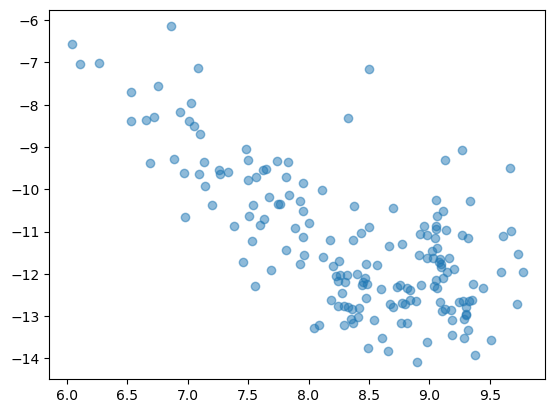

In [17]:
plt.scatter(data['log_distance'], data['log_trade_ctrl_ms'], alpha=0.5)

# 5)

In [18]:
data[data['comlang'] == 1]

,year,iso_o,iso_d,value,gdp_d,dist,border,comlang,comleg,log_trade,log_distance,log_gdp_d,log_trade_ctrl_ms
57,2019,GRC,CYP,2126.615,24900000.0,957.481,0.0,1.0,0.0,7.662757,6.864306,17.030378,-6.150104


In [20]:
# Regression
model4 = smf.ols('log_trade ~ log_distance + log_gdp_d + C(border) + C(comlang)', data=data).fit(cov_type="HC0")
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     717.7
Date:                Sun, 15 Feb 2026   Prob (F-statistic):          1.92e-104
Time:                        13:27:58   Log-Likelihood:                -273.30
No. Observations:                 173   AIC:                             556.6
Df Residuals:                     168   BIC:                             572.4
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5605      1.37

It does not surprise me. It makes sense that countries sharing the same border and language would trade more. Also considering how significantly Greece trades with Cyprus (the only country sharing a language), the magnitude makes sense.

# 6)

In [22]:
EU = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU',
      'SVK','SVN','ESP','SWE']

data['inEU'] = data['iso_d'].isin(EU).astype(int)

# Regression
model5 = smf.ols('log_trade ~ log_distance + log_gdp_d + C(border) + C(comlang) + C(inEU)', data=data).fit(cov_type="HC0")
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     619.1
Date:                Sun, 15 Feb 2026   Prob (F-statistic):          8.90e-106
Time:                        13:28:13   Log-Likelihood:                -268.26
No. Observations:                 173   AIC:                             548.5
Df Residuals:                     167   BIC:                             567.4
Df Model:                           5                                         
Covariance Type:                  HC0                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9716      1.51

By leaving the EU, Greece's exports to the EU would be cut by approximately half.